# Demo - Milky Way detection rate
This demo uses ``LEGWORK`` to compute the detection rate of double compact objects in the Milky Way with LISA

In [1]:
%matplotlib inline

In [2]:
import legwork as lw
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

## Define a set of sources
Ordinarily, people use a binary population synthesis code such as COMPAS or COSMIC to create a sample of sources in order to assess their detectability. For simplicity, we can just draw a series of parameters from arbitrary random distributions. However, you'd only need to load in your specific values instead of use these random functions to adapt this demo to work in that way.

Therefore, let's create a series of random BHBH sources and define their parameters at the moment of double compact object formation.

In [45]:
n_sources = int(1e5)

m_1 = np.random.uniform(3, 30, n_sources) * u.Msun
m_2 = np.random.uniform(0, 1, n_sources) * m_1

ecc = 1 - np.random.power(5, n_sources)
f_orb = 10**(3 * np.random.beta(2, 2, n_sources) - 5) * u.Hz

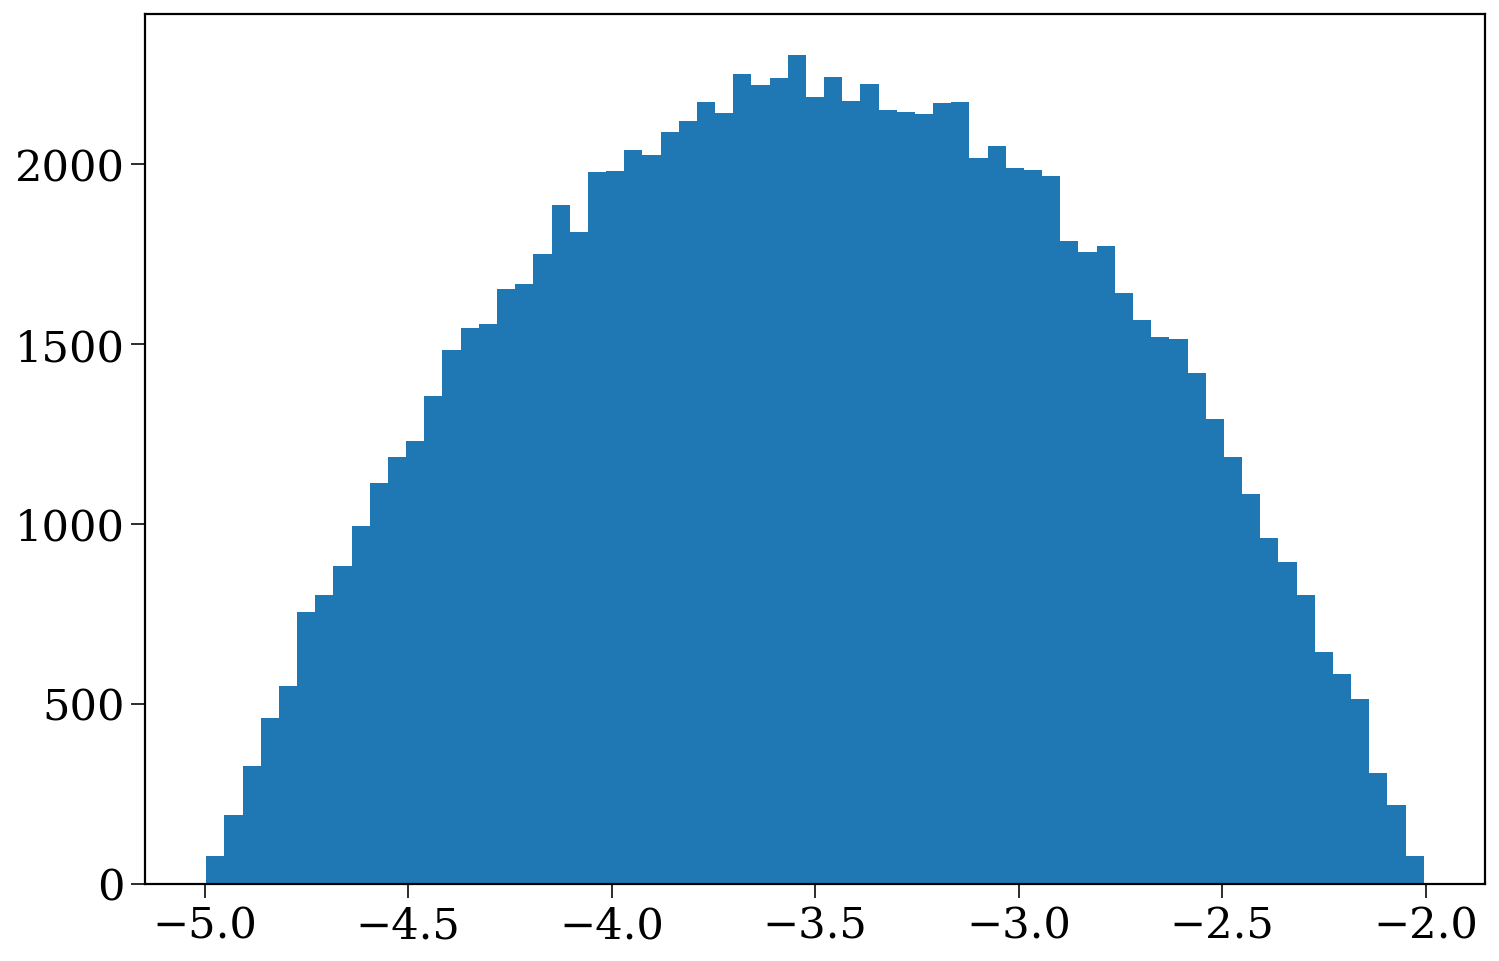

In [44]:
plt.hist(3 * np.random.beta(2, 2, n_sources) - 5, bins="auto")
plt.show()

## Place them in a random Milky Way
For simplicity, we can just place these binaries in a toy model of the Milky Way independent of their chemical enrichment history and assuming the entire Milky Way is only composed of a single disc. In order to make a more complicated Milky Way model you just need to change the `random_R` and `random_z` functions.

For an example of the use of a more complex view of the Milky Way in making LISA predictions take a look at Wagg et al. (2021).

In [46]:
def random_R(size=1000):
    return np.random.exponential(3, size) * u.kpc

def random_z(size=1000):
    return np.random.normal(0, 0.6, size) * u.kpc

def random_theta(size=1000):
    return np.random.uniform(0, 2 * np.pi, size)

def distance_from_earth(R, z, theta, Rsun=8 * u.kpc):
    return np.sqrt(z**2 + R**2 + Rsun**2 - 2 * Rsun * R * np.cos(theta))

def random_dist(size=1000):
    R, z, theta = random_R(size), random_z(size), random_theta(size)
    return distance_from_earth(R, z, theta)

In [47]:
dist = random_dist(n_sources)

In addition to positions, we also need to give each source a random birth time. For the purposes of this demo, we can keep things simple and just assume that everything was formed uniformly over the past billion years. Note we could just as easily 

In [48]:
time_since_formed = np.random.uniform(0, 1, n_sources) * u.Gyr

## Evolve sources until present day
Now we have everything that we need to initialise a `LEGWORK` source class. Let's do that and then evolve the sources from their DCO formation until the present day to assess which are detectable with LISA.

In [8]:
import time

In [49]:
start = time.time()
sources = lw.source.Source(m_1=m_1, m_2=m_2, dist=dist, ecc=ecc, f_orb=f_orb)
sources.evolve_sources(t_evol=time_since_formed)
print(time.time() - start)

105.62805914878845


In [50]:
len(sources.merged[sources.merged])

95473

## Calculate SNR and fraction that are detectable

In [51]:
snr = sources.get_snr(verbose=True)

Calculating SNR for 100000 sources
	95473 sources have already merged
	4527 sources are stationary
		1864 sources are stationary and circular
		2663 sources are stationary and eccentric


In [52]:
print(len(snr[snr > 7]) / len(snr))

0.00065


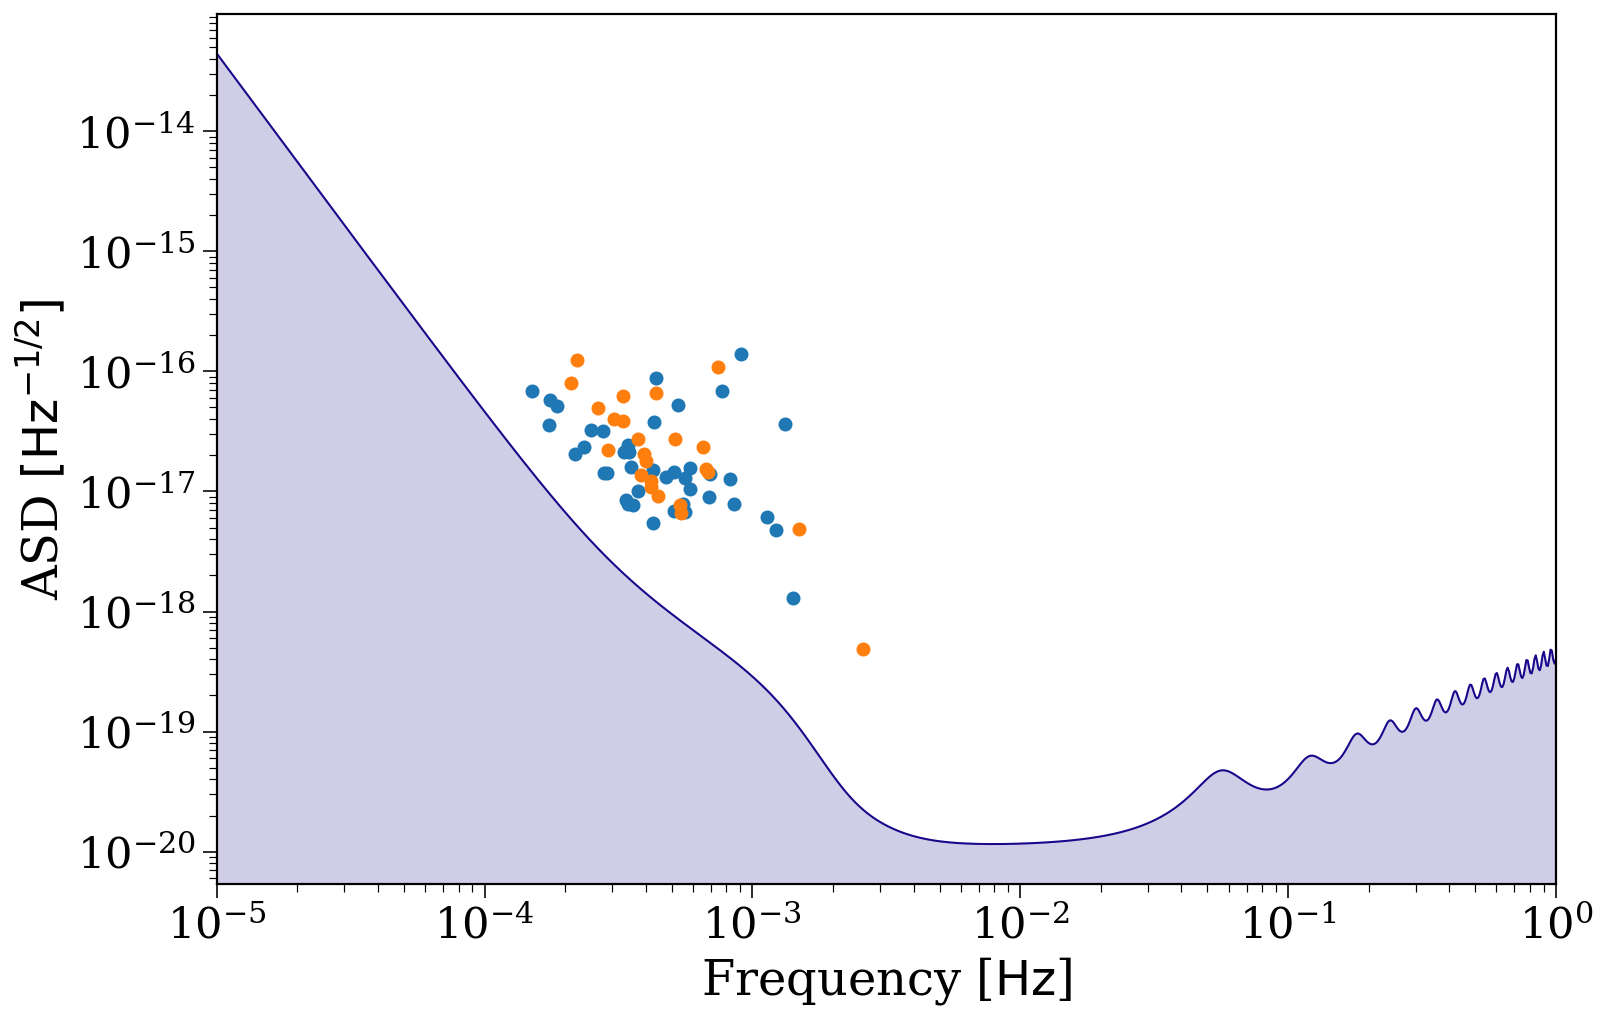

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [53]:
sources.plot_sources_on_sc(snr_cutoff=7)

4527
4527
{'bins': array([1.00000000e-05, 1.21152766e-05, 1.46779927e-05, 1.77827941e-05,
       2.15443469e-05, 2.61015722e-05, 3.16227766e-05, 3.83118685e-05,
       4.64158883e-05, 5.62341325e-05, 6.81292069e-05, 8.25404185e-05,
       1.00000000e-04, 1.21152766e-04, 1.46779927e-04, 1.77827941e-04,
       2.15443469e-04, 2.61015722e-04, 3.16227766e-04, 3.83118685e-04,
       4.64158883e-04, 5.62341325e-04, 6.81292069e-04, 8.25404185e-04,
       1.00000000e-03]), 'range': None, 'density': True, 'cumulative': False, 'bottom': None, 'histtype': 'bar', 'align': 'mid', 'orientation': 'vertical', 'rwidth': None, 'log': False, 'label': None}
plotting done
giving it back now
283
283
{'bins': array([1.00000000e-05, 1.21152766e-05, 1.46779927e-05, 1.77827941e-05,
       2.15443469e-05, 2.61015722e-05, 3.16227766e-05, 3.83118685e-05,
       4.64158883e-05, 5.62341325e-05, 6.81292069e-05, 8.25404185e-05,
       1.00000000e-04, 1.21152766e-04, 1.46779927e-04, 1.77827941e-04,
       2.15443469e-0

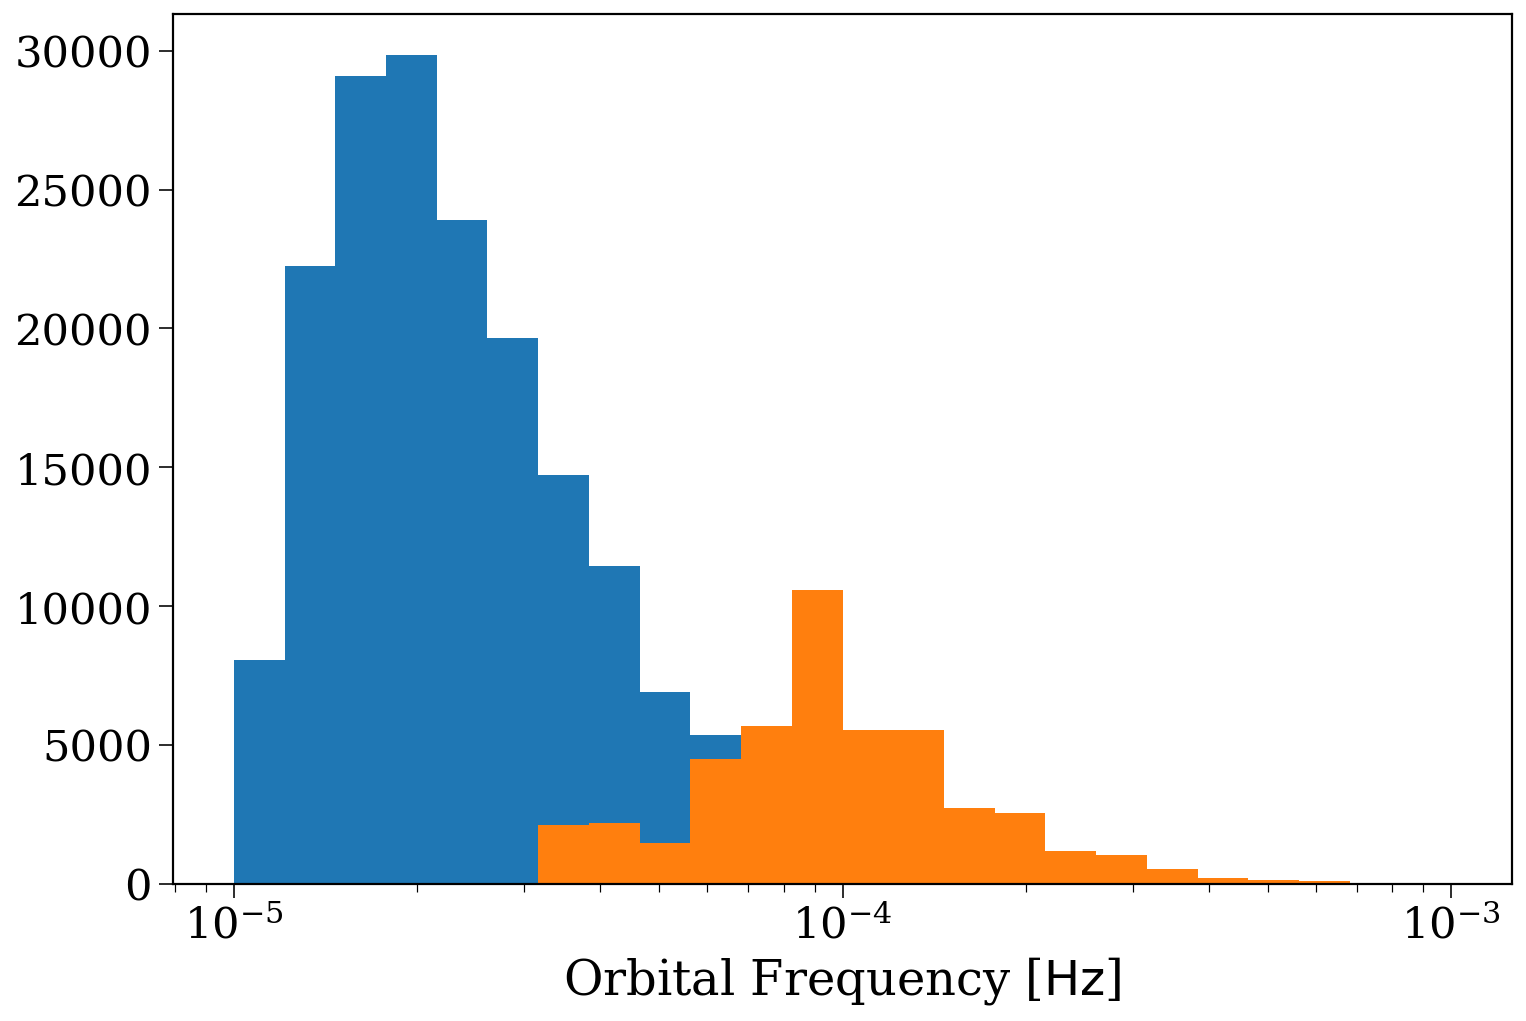

In [71]:
fig, ax = sources.plot_source_variables("f_orb", bins=np.logspace(-5, -3, 25), show=False, density=True)
fig, ax = sources.plot_source_variables("f_orb", which_sources=sources.snr > 1, bins=np.logspace(-5, -3, 25), show=False, fig=fig, ax=ax, density=True)
ax.set_xscale("log")
plt.show()

4527
4527
{'gridsize': 200, 'cut': 3, 'clip': None, 'legend': True, 'cumulative': False, 'bw_method': 'scott', 'bw_adjust': 1, 'log_scale': (True, False), 'fill': True, 'label': 'All', 'linewidth': None, 'linestyle': '-'}
plotting done
giving it back now
283
283
{'gridsize': 200, 'cut': 3, 'clip': None, 'legend': True, 'cumulative': False, 'bw_method': 'scott', 'bw_adjust': 1, 'log_scale': (True, False), 'fill': True, 'label': 'detectable', 'linewidth': None, 'linestyle': '-'}
plotting done
giving it back now


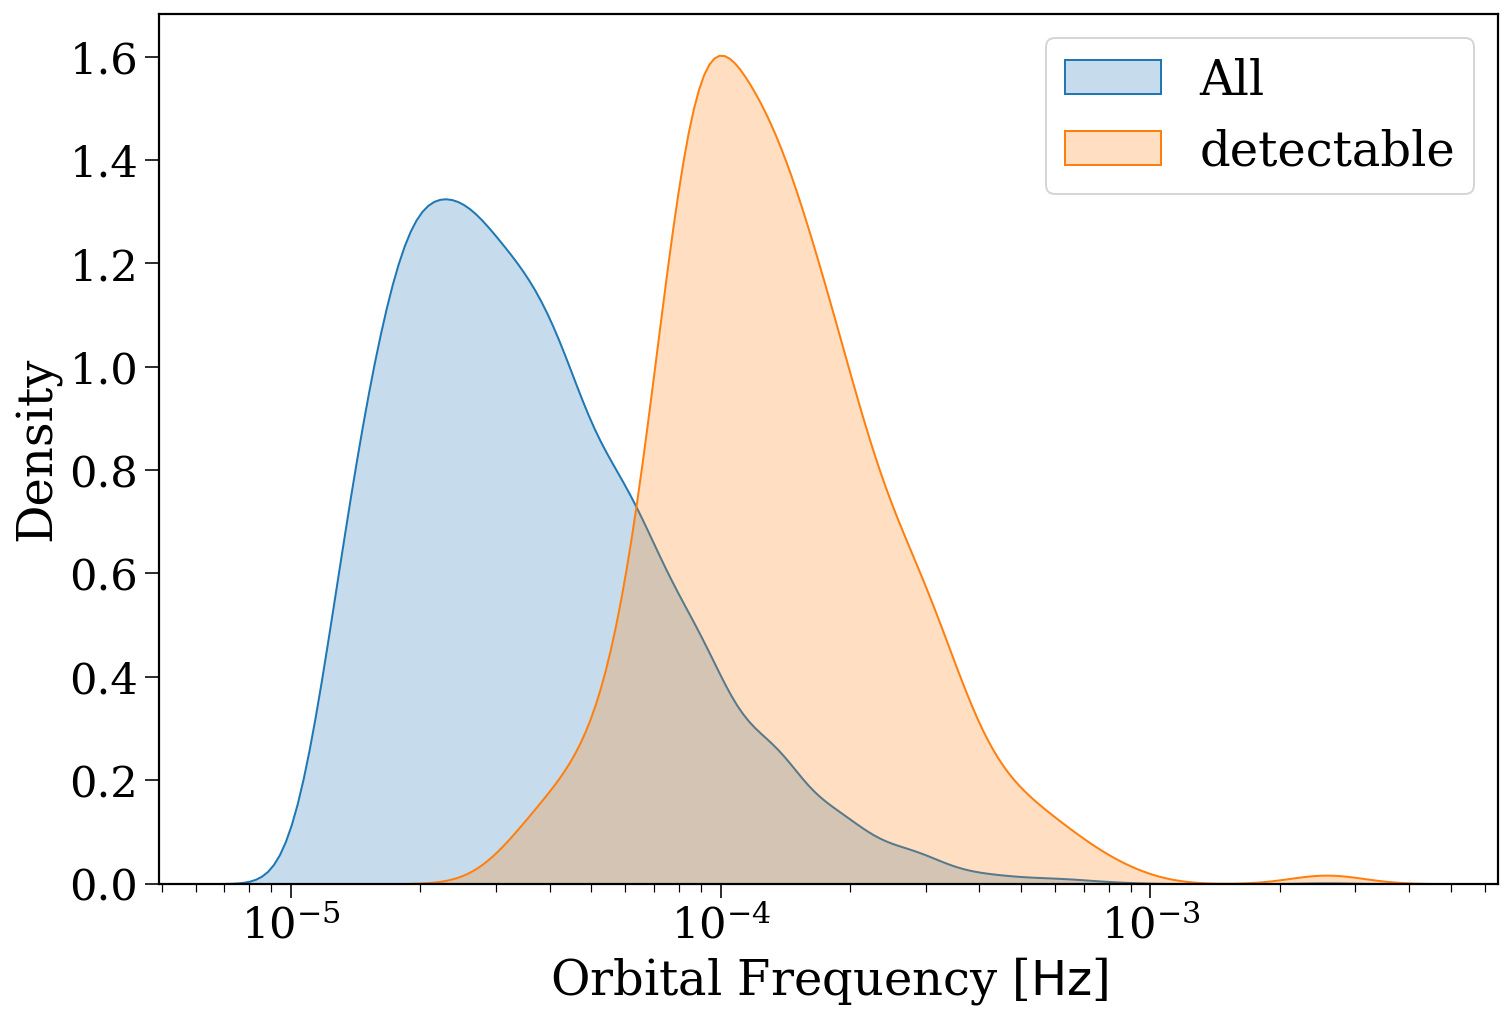

In [75]:
fig, ax = sources.plot_source_variables("f_orb", show=False, disttype="kde", log_scale=(True, False), fill=True, linestyle="-", label="All")
fig, ax = sources.plot_source_variables("f_orb", which_sources=sources.snr > 1, fig=fig, ax=ax, show=False, disttype="kde", log_scale=(True, False), fill=True, linestyle="-", label="detectable")
ax.legend()
plt.show()

4527
4527
{'stat': 'proportion', 'complementary': False, 'log_scale': None, 'legend': True, 'label': 'All', 'linewidth': None, 'linestyle': None}
plotting done
giving it back now
283
283
{'stat': 'proportion', 'complementary': False, 'log_scale': None, 'legend': True, 'label': 'detectable', 'linewidth': None, 'linestyle': None}
plotting done
giving it back now


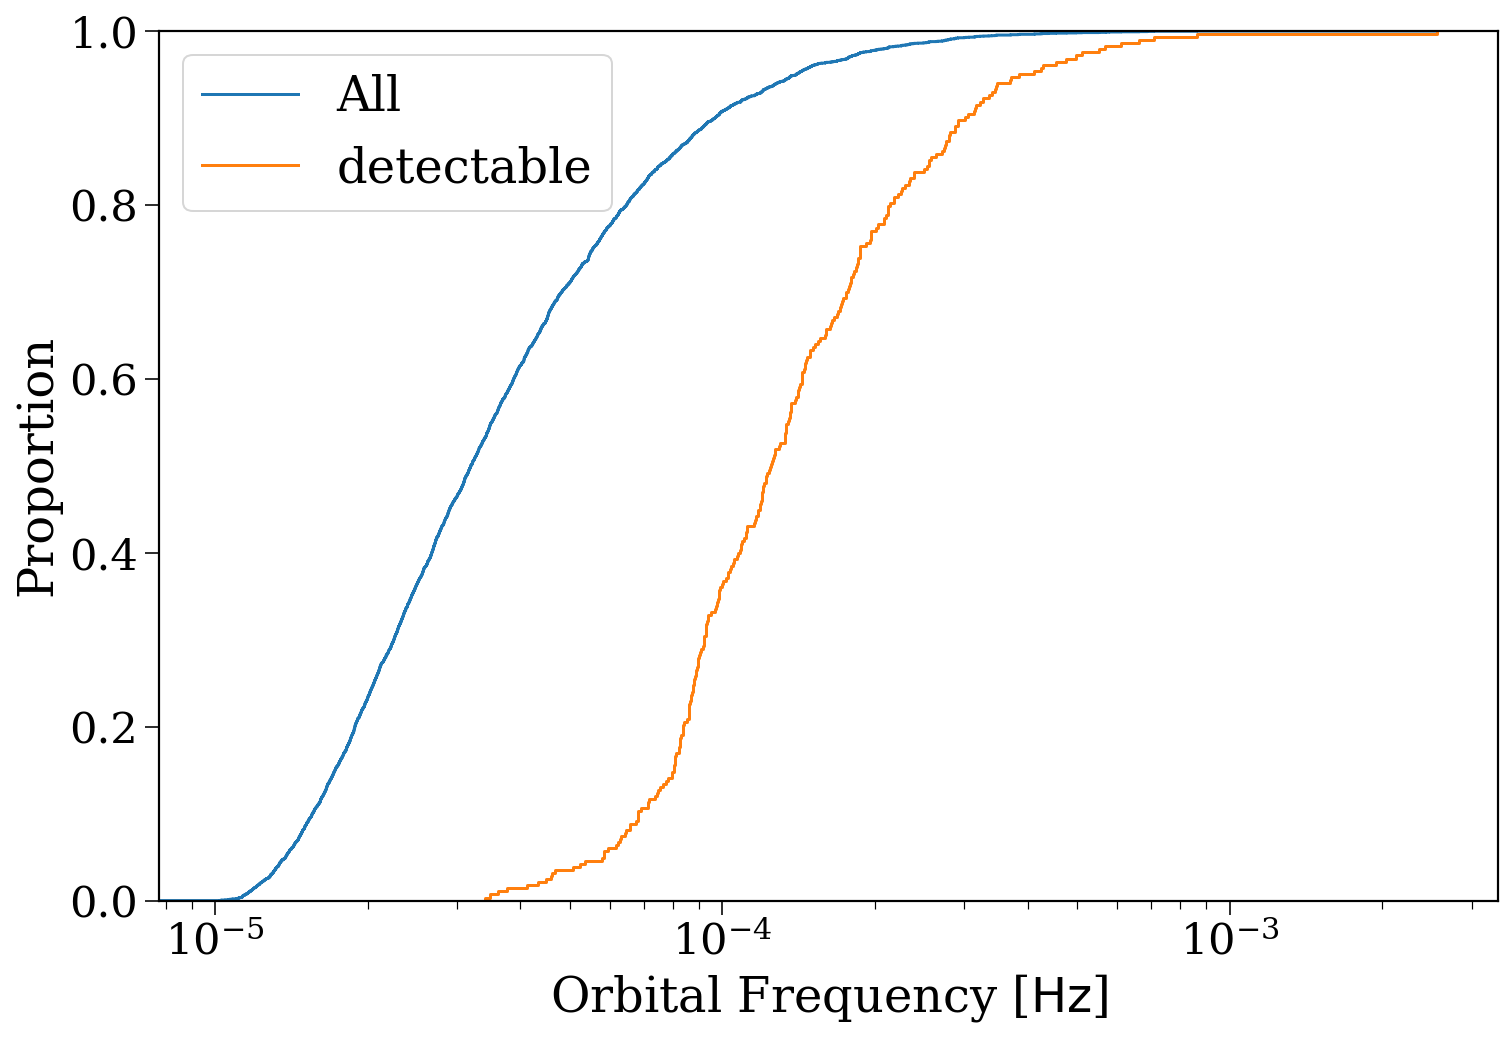

In [78]:
fig, ax = sources.plot_source_variables("f_orb", show=False, disttype="ecdf", label="All")
fig, ax = sources.plot_source_variables("f_orb", which_sources=sources.snr > 1, fig=fig, ax=ax, show=False, disttype="ecdf", label="detectable")
ax.legend()
ax.set_xscale("log")
plt.show()